In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [2]:
# Import the datasets
HouseTrain3=pd.read_csv('/Users/plutobot/Downloads/Kaggle/HousingData/train3.csv')

In [3]:
HouseTrain3=HouseTrain3.drop(columns=['Unnamed: 0'])

In [4]:
len(HouseTrain3)

1412

In [5]:
# Numeric variables - Data wrangling
HouseTrain3['LotFrontage'].describe()

count    1412.000000
mean       57.671388
std        34.872691
min         0.000000
25%        41.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [6]:
HouseTrain3['LotFrontage']=HouseTrain3['LotFrontage'].replace(0.0,1.0)

In [7]:
HouseTrain3['LotFrontage'].describe()

count    1412.000000
mean       57.849150
std        34.579368
min         1.000000
25%        41.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


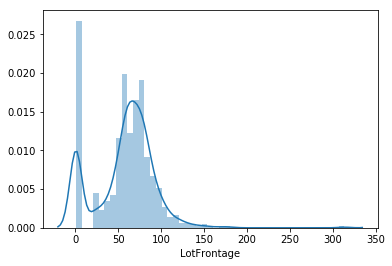

In [8]:
sns.distplot(HouseTrain3['LotFrontage'])

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


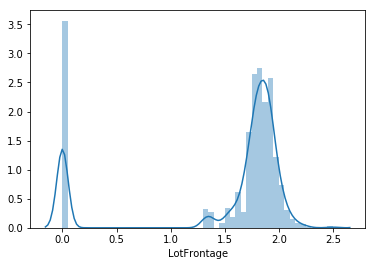

In [9]:
sns.distplot((np.log10(HouseTrain3['LotFrontage'])))

In [10]:
HouseTrain3['LotFrontage']=np.log10(HouseTrain3['LotFrontage'])

In [11]:
HouseTrain3['LotArea'].describe()

count      1412.000000
mean      10536.987252
std       10113.840927
min        1300.000000
25%        7572.750000
50%        9500.000000
75%       11618.250000
max      215245.000000
Name: LotArea, dtype: float64

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


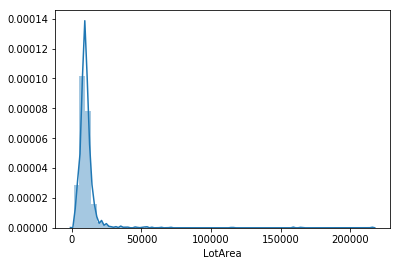

In [12]:
sns.distplot(HouseTrain3['LotArea'])

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


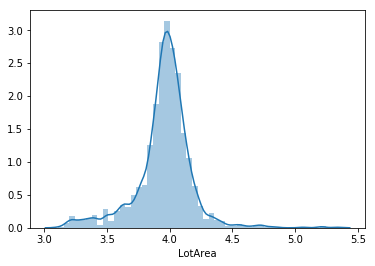

In [13]:
sns.distplot((np.log10(HouseTrain3['LotArea'])))

In [14]:
HouseTrain3['LotArea']=np.log10(HouseTrain3['LotArea'])

In [15]:
HouseTrain3['OverallQual'].describe()

count    1412.000000
mean        6.138810
std         1.357655
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [16]:
HouseTrain3['MasVnrArea'].describe()

count    1412.000000
mean      105.366856
std       182.340601
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [17]:
HouseTrain3['MasVnrArea']=HouseTrain3['MasVnrArea'].replace(0.0,1.0)

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


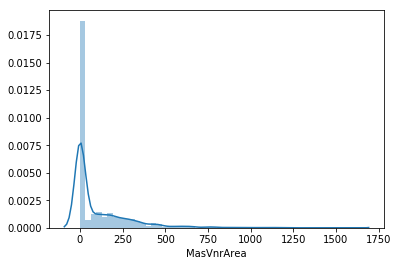

In [18]:
sns.distplot(HouseTrain3['MasVnrArea'])

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


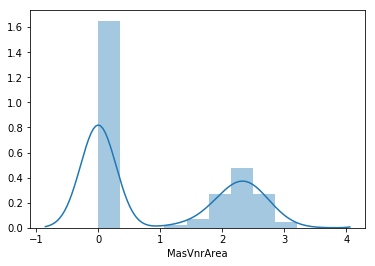

In [19]:
sns.distplot((np.log10(HouseTrain3['MasVnrArea'])))

In [20]:
HouseTrain3['MasVnrArea']=np.log10(HouseTrain3['MasVnrArea'])

In [21]:
HouseTrain3['BsmtFinSF1'].describe()

count    1412.000000
mean      453.694759
std       455.373263
min         0.000000
25%         0.000000
50%       399.000000
75%       719.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


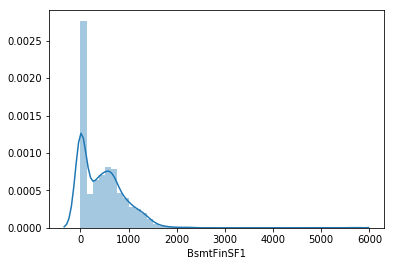

In [22]:
HouseTrain3['BsmtFinSF1']=HouseTrain3['BsmtFinSF1'].replace(0.0,1.0)
sns.distplot(HouseTrain3['BsmtFinSF1'])

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


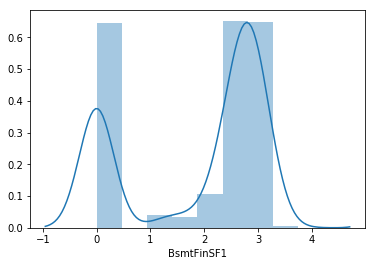

In [23]:
sns.distplot((np.log10(HouseTrain3['BsmtFinSF1'])))

In [24]:
HouseTrain3['BsmtFinSF1']=np.log10(HouseTrain3['BsmtFinSF1'])

In [25]:
HouseTrain3['BsmtFinSF2'].describe()

count    1412.000000
mean       47.792493
std       163.410333
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


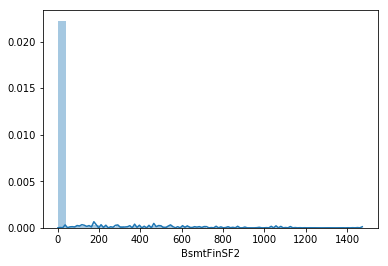

In [26]:
HouseTrain3['BsmtFinSF2']=HouseTrain3['BsmtFinSF2'].replace(0.0,1.0)
sns.distplot(HouseTrain3['BsmtFinSF2'])

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


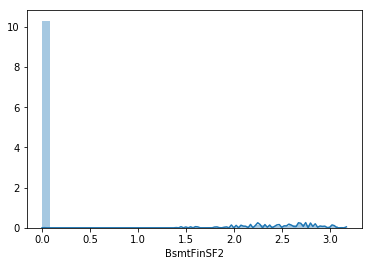

In [27]:
sns.distplot((np.log10(HouseTrain3['BsmtFinSF2'])))

In [28]:
HouseTrain3['BsmtFinSF2']=np.log10(HouseTrain3['BsmtFinSF2'])

In [29]:
HouseTrain3['BsmtUnfSF'].describe()

count    1412.000000
mean      581.065156
std       437.571238
min         0.000000
25%       247.000000
50%       490.000000
75%       813.250000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


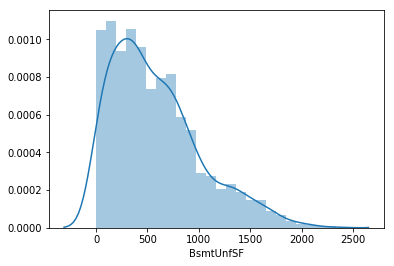

In [30]:
HouseTrain3['BsmtUnfSF']=HouseTrain3['BsmtUnfSF'].replace(0.0,1.0)
sns.distplot(HouseTrain3['BsmtUnfSF'])

In [31]:
HouseTrain3['TotalBsmtSF'].describe()

count    1412.000000
mean     1082.552408
std       404.766998
min       105.000000
25%       809.500000
50%      1004.000000
75%      1306.750000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


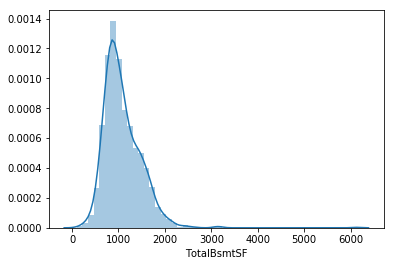

In [32]:
sns.distplot(HouseTrain3['TotalBsmtSF'])

In [33]:
HouseTrain3['1stFlrSF'].describe()

count    1412.000000
mean     1162.851275
std       385.285816
min       438.000000
25%       882.000000
50%      1086.000000
75%      1392.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


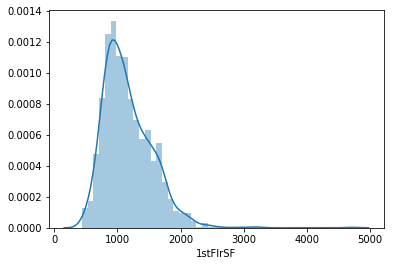

In [34]:
sns.distplot(HouseTrain3['1stFlrSF'])

In [35]:
HouseTrain3['2ndFlrSF'].describe()

count    1412.000000
mean      350.942635
std       437.740925
min         0.000000
25%         0.000000
50%         0.000000
75%       730.500000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


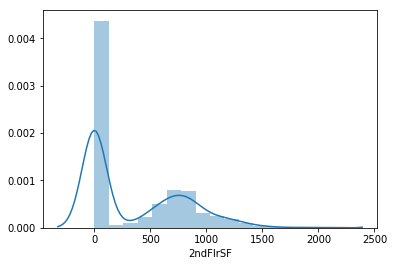

In [36]:
HouseTrain3['2ndFlrSF']=HouseTrain3['2ndFlrSF'].replace(0.0,1.0)
sns.distplot(HouseTrain3['2ndFlrSF'])

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


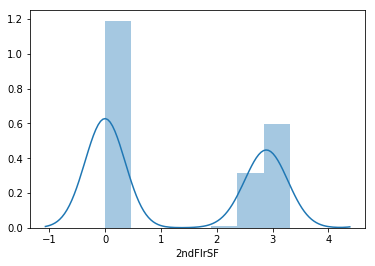

In [37]:
sns.distplot((np.log10(HouseTrain3['2ndFlrSF'])))

In [38]:
HouseTrain3['2ndFlrSF']=np.log10(HouseTrain3['2ndFlrSF'])

In [39]:
HouseTrain3['LowQualFinSF'].describe()

count    1412.000000
mean        6.005666
std        49.415492
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64

In [40]:
HouseTrain3['LowQualFinSF']=HouseTrain3['LowQualFinSF'].replace(0.0,1.0)

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


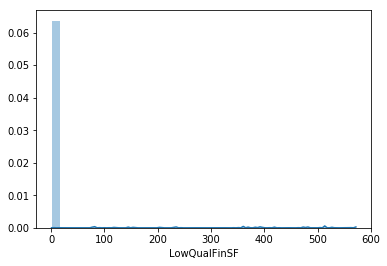

In [41]:
sns.distplot(HouseTrain3['LowQualFinSF'])

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


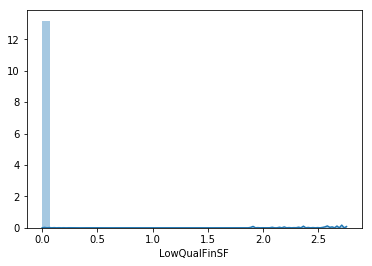

In [42]:
sns.distplot(np.log10(HouseTrain3['LowQualFinSF']))

In [43]:
HouseTrain3['GrLivArea'].describe()

count    1412.000000
mean     1519.799575
std       526.846267
min       438.000000
25%      1135.750000
50%      1467.000000
75%      1784.500000
max      5642.000000
Name: GrLivArea, dtype: float64

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


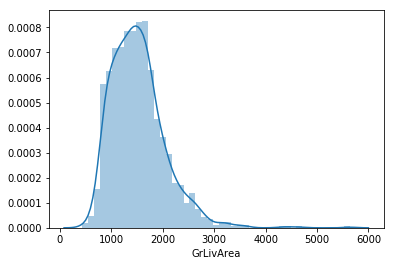

In [44]:
sns.distplot(HouseTrain3['GrLivArea'])

In [45]:
HouseTrain3['GarageArea'].describe()

count    1412.000000
mean      475.169972
std       213.417442
min         0.000000
25%       336.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [46]:
HouseTrain3['GarageArea']=HouseTrain3['GarageArea'].replace(0.0,1.0)

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


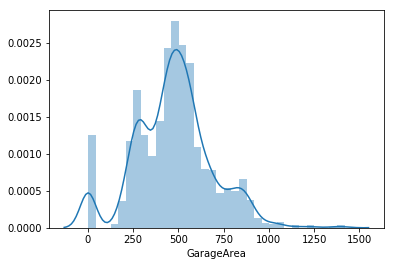

In [47]:
sns.distplot(HouseTrain3['GarageArea'])

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


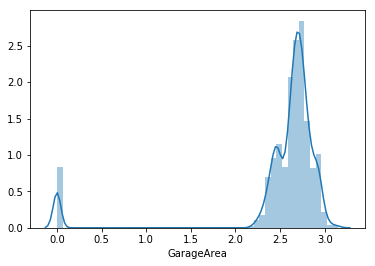

In [48]:
sns.distplot(np.log10(HouseTrain3['GarageArea']))

In [49]:
HouseTrain3['GarageArea']=np.log10(HouseTrain3['GarageArea'])

In [50]:
HouseTrain3['WoodDeckSF'].describe()

count    1412.000000
mean       96.289660
std       126.259423
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

In [51]:
HouseTrain3['WoodDeckSF']=HouseTrain3['WoodDeckSF'].replace(0.0,1.0)

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


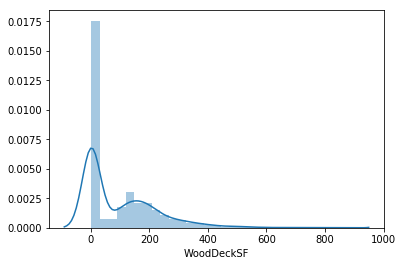

In [52]:
sns.distplot(HouseTrain3['WoodDeckSF'])

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


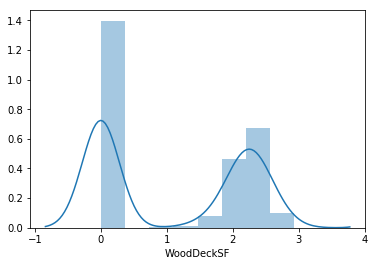

In [53]:
sns.distplot(np.log10(HouseTrain3['WoodDeckSF']))

In [54]:
HouseTrain3['WoodDeckSF']=np.log10(HouseTrain3['WoodDeckSF'])

In [55]:
HouseTrain3['OpenPorchSF'].describe()

count    1412.000000
mean       47.247167
std        66.512564
min         0.000000
25%         0.000000
50%        26.000000
75%        69.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

In [56]:
HouseTrain3['OpenPorchSF']=HouseTrain3['OpenPorchSF'].replace(0.0,1.0)

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


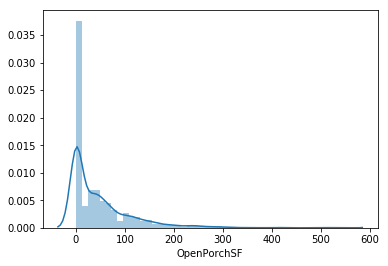

In [57]:
sns.distplot(HouseTrain3['OpenPorchSF'])

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


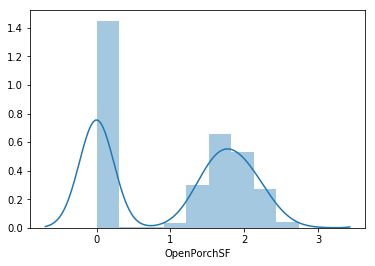

In [58]:
sns.distplot(np.log10(HouseTrain3['OpenPorchSF']))

In [59]:
HouseTrain3['OpenPorchSF']=np.log10(HouseTrain3['OpenPorchSF'])

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


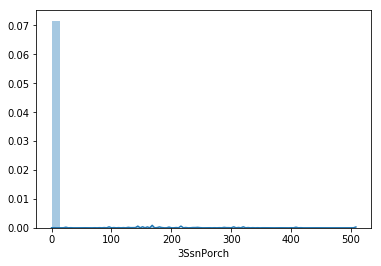

In [60]:
sns.distplot(HouseTrain3['3SsnPorch'])

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


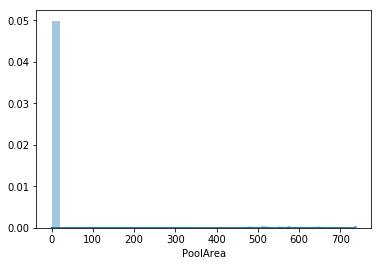

In [61]:
sns.distplot(HouseTrain3['PoolArea'])

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


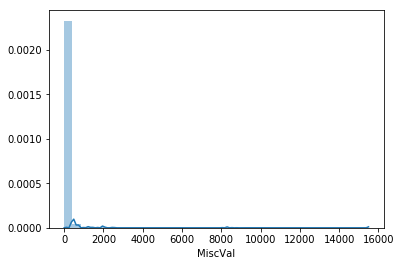

In [62]:
sns.distplot(HouseTrain3['MiscVal'])

In [63]:
HouseTrain3['MiscVal']=HouseTrain3['MiscVal'].replace(0.0,1.0)

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


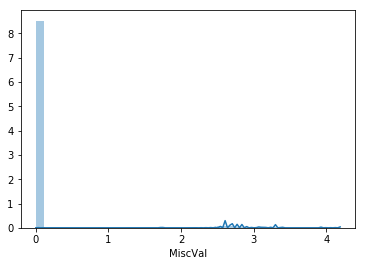

In [64]:
sns.distplot(np.log10(HouseTrain3['MiscVal']))

In [65]:
HouseTrain3['MiscVal']=np.log10(HouseTrain3['MiscVal'])

In [66]:
HouseTrain3['SalePrice'].describe()

count      1412.000000
mean     182507.021955
std       79270.416057
min       34900.000000
25%      131475.000000
50%      164600.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/plutobot/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


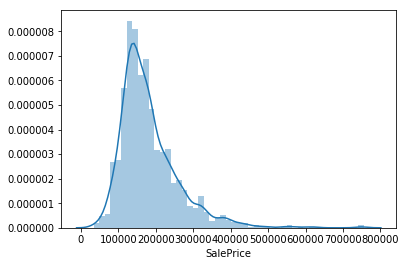

In [67]:
sns.distplot(HouseTrain3['SalePrice'])

In [68]:
HouseTrain3.count()

Id               1412
MSSubClass       1412
MSZoning         1412
LotFrontage      1412
LotArea          1412
Street           1412
LotShape         1412
LandContour      1412
LotConfig        1412
LandSlope        1412
Neighborhood     1412
Condition1       1412
Condition2       1412
BldgType         1412
HouseStyle       1412
OverallQual      1412
OverallCond      1412
YearBuilt        1412
YearRemodAdd     1412
RoofStyle        1412
RoofMatl         1412
Exterior1st      1412
Exterior2nd      1412
MasVnrType       1412
MasVnrArea       1412
ExterQual        1412
ExterCond        1412
Foundation       1412
BsmtQual         1412
BsmtCond         1412
                 ... 
BsmtHalfBath     1412
FullBath         1412
HalfBath         1412
BedroomAbvGr     1412
KitchenAbvGr     1412
KitchenQual      1412
TotRmsAbvGrd     1412
Functional       1412
Fireplaces       1412
FireplaceQu      1412
GarageType       1412
GarageYrBlt      1412
GarageFinish     1412
GarageCars       1412
GarageArea

In [69]:
pd.set_option('display.max_rows',None)

In [70]:
HouseTrain3.dtypes

Id                 int64
MSSubClass         int64
MSZoning         float64
LotFrontage      float64
LotArea          float64
Street           float64
LotShape         float64
LandContour      float64
LotConfig        float64
LandSlope        float64
Neighborhood     float64
Condition1       float64
Condition2       float64
BldgType         float64
HouseStyle       float64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle        float64
RoofMatl         float64
Exterior1st      float64
Exterior2nd      float64
MasVnrType       float64
MasVnrArea       float64
ExterQual        float64
ExterCond        float64
Foundation       float64
BsmtQual         float64
BsmtCond         float64
BsmtExposure     float64
BsmtFinType1     float64
BsmtFinSF1       float64
BsmtFinType2     float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF        int64
Heating          float64
HeatingQC        float64
CentralAir       float64


In [71]:
HouseTrain3.to_csv('/Users/plutobot/Downloads/Kaggle/HousingData/train4.csv')